#  An Exploratory Analysis of Loan Data from Prosper.
## by Ikebude, Precious Chidiebere.

## Introduction
> Prosper Marketplace, Inc. is a San Francisco, California-based company in the peer-to-peer lending industry. Its subsidiary operates Prosper.com; a website where individuals can either invest in personal loans(peer-to-peer) or request to borrow money. Though founded in 2005 with pioneer status, it has facilitated over 21 billion dollars in loans to over 1.3M people. Prosper provides unsecure loans(Loans which do not require collateral)
The prosper loan dataset contains information on several variables representing about 113,937 loans collected from the company. It includes customers who have collected loans, customers who have cleared off pending loans as well as customers who have defaulted on their loan repayment schedules.
From the original dataset which contains 113937 rows and 81 columns, i analysed 14 variables.



## The 14 parameters analyzed include: 

**LoanOriginalAmount:** The origination amount of the loan.

**LenderYield:** The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

**LoanStatus:** The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.

**IncomeRange:** The income range of the borrower at the time the listing was created.

**LoanOriginationDate:** The date the loan was originated.

**CreditScoreRangeLower:** The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

**CreditScoreRangeUpper:** The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

**Term:** The length of the loan expressed in months.

**ProsperRating (numeric):** The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009. Its rating relevance is arranged in ascending order, with 1 being high risk and 7 being the best score.

**ListingCategory:** The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

**EmploymentStatus:** The employment status of the borrower at the time they posted the listing.

**IncomeVerifiable:** The borrower indicated they have the required documentation to support their income.

**IsBorrowerHomeowner:** A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

**StatedMonthlyIncome:** The monthly income the borrower stated at the time the listing was created.
****
****












## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Load dataset
loan = pd.read_csv('Prosperloandata.csv')

In [3]:
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
#lets get the shape of the dataset
loan.shape

(113937, 81)

### What is the structure of your dataset?

> The Prosper loan dataset has 113,937 sample entries in this mother dataset with 81 distinct attributes or characteristics. However, i analysed 14 out of the 81 attributes.

### What is/are the main feature(s) of interest in your dataset?

> My major feature of interest is the Lender Yield. This is because my aim is to identify features of an individual which an investor should consider important when choosing a prosper loan to fund. These features will also help the Prosper Company minimise the occurence of high risk loans which doesnt benefit investors and the Prosper company as a whole.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am interested in identifying charateristics which will help the Prosper company investors chose the best types of clients for its loan investments, as well as individuals with potential. It is important to invest in customers who do not default on their loan payments for maximum individual profits and an overall company growth.
However, as i do not have data on payments already made, i will focus on what is to be expected based on the presence or absense of certain characteristics such as an income, house ownership, employment, credit scores, prosper ratings etc.

# Data Accessment

In [5]:
#Ensure no columns are hidden 
pd.set_option('display.max_columns', None)

In [6]:
#Access a random sample of the dataset
loan.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
85370,B4483382724433025285F1C,108369,2007-03-08 09:00:20.663000000,E,36,Chargedoff,2009-02-18 00:00:00,0.18454,0.1700,0.1500,NaN,NaN,NaN,NaN,NaN,NaN,0,WI,Administrative Assistant,Full-time,249.0,True,True,3728337920066966950EC8B,2007-02-26 13:52:57.433000000,560.0,579.0,1987-10-16 00:00:00,9.0,9.0,28.0,6,313.0,3.0,18.0,0.0,0.0,10.0,1.0,0.0,6689.0,0.96,185.0,19.0,0.70,0.0,0.42,"$25,000-49,999",True,3166.666667,FAE33383979482308A189CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1967,23.0,84,8650,3500,2007-03-20 00:00:00,Q1 2007,E3CD3382777685418C91C47,124.78,2097.3700,1386.12,711.2500,-43.69,0.0,2113.86,2113.88,0.0,1.0,1,0,0.00,44
12204,19493525070195306B39B26,524084,2011-08-27 13:23:06.817000000,NaN,36,Completed,2012-08-10 00:00:00,0.22362,0.1899,0.1799,0.17570,0.0610,0.11470,4.0,C,7.0,1,OH,Car Dealer,Employed,3.0,True,False,NaN,2011-08-27 13:23:04,780.0,799.0,1974-06-03 00:00:00,15.0,13.0,43.0,6,108.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2196.0,0.07,25553.0,31.0,0.96,1.0,0.55,"$1-24,999",True,2000.000000,12823628816840674792178,1.0,6.0,6.0,0.0,0.0,2000.0,1742.49,-29.0,0,NaN,31,52878,2000,2011-08-30 00:00:00,Q3 2011,CDE2350590850841767A80A,73.30,2319.3000,2000.00,319.3000,-16.81,0.0,0.00,0.00,0.0,1.0,0,0,0.00,27
79704,CD74350224030506267EA0D,488121,2010-12-18 11:43:47.410000000,NaN,36,Completed,2012-09-21 00:00:00,0.08341,0.0800,0.0700,0.07000,0.0155,0.05450,7.0,AA,10.0,1,CA,Executive,Employed,61.0,False,False,NaN,2010-12-18 11:43:41,800.0,819.0,1981-06-01 00:00:00,8.0,7.0,22.0,9,574.0,2.0,3.0,0.0,0.0,0.0,2.0,0.0,4958.0,0.22,17442.0,21.0,0.95,0.0,0.07,"$100,000+",True,18333.333333,6E443607929292595490570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,39,46300,25000,2010-12-29 00:00:00,Q4 2010,4DB8350192326950503019B,783.41,27581.2800,25000.00,2581.2800,-322.66,0.0,0.00,0.00,0.0,1.0,0,0,0.00,170
40037,137A3543070088818DA80A6,576052,2012-04-06 08:47:56.167000000,NaN,36,Current,NaN,0.35797,0.3177,0.3077,0.28960,0.1650,0.12460,1.0,HR,3.0,2,AZ,Teacher,Employed,372.0,True,False,NaN,2012-04-06 08:47:51,680.0,699.0,1991-05-02 00:00:00,5.0,4.0,25.0,3,48.0,3.0,10.0,0.0,0.0,0.0,0.0,0.0,7920.0,0.76,2170.0,23.0,0.86,1.0,NaN,"$25,000-49,999",False,2833.333333,0E8E364959643015094F291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,23,64189,4000,2012-04-24 00:00:00,Q2 2012,78D135436608899347460EE,173.71,3836.6200,1991.65,1844.9700,-52.06,0.0,0.00,0.00,0.0,1.0,0,0,0.00,79
88919,AE563405812140618A0B67C,243035,20

In [7]:
#Check column information to identify attributes i want to work on
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [8]:
#Summary statistics of dataset
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

# Data Quality issues
> Datetime objects listed as strings (ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, LoanOriginationDate)

> Categorical data columns are listed as objects or floats(LoanStatus, ProsperRating (numeric), ProsperRating (Alpha), EmploymentStatus, IncomeRange)

> StatedMonthlyIncome column values are floats, making it more difficult for my use case.

> Missing values

# Data Tidiness issues
> Loan origination date is holding more than one data type (date and time) 

# Data Cleaning


In [9]:
loan_clean = loan.copy()

### Define
**Loan origination date column is holding more than one data type (date and time)**

Split Loan origination date column to get date and time 

### Code

In [10]:
#Split column by space dividing date and time
loan_clean[['loan_origination_date','loan_origination_time']] = loan_clean['LoanOriginationDate'].str.split(' ', expand=True)

### Test

In [11]:
#Check for the creation of new columns 
loan_clean.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_origination_date,loan_origination_time
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,2007-09-12,00:00:00
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2014-03-03,00:00:00


### Define
**Inaccurate datatype**

Convert ListingCreationDate, ClosedDate, DateCreditPulled, FirstRecordedCreditLine, loan_origination_date and LoanOriginationDate columns to datetime datatype


### Code

In [12]:
#Convert columns in date_columns list to Datetime using a function
import pandas as pd

date_columns = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate', 'loan_origination_date']

# Convert columns in date_columns list to datetime using pd.to_datetime
for col in date_columns:
    loan_clean[col] = pd.to_datetime(loan_clean[col], errors='coerce')

### Test

In [13]:
#Confirm new data types
loan_clean['ListingCreationDate'].dtype
loan_clean['DateCreditPulled'].dtype
loan_clean['LoanOriginationDate'].dtype
loan_clean['loan_origination_date'].dtype

dtype('<M8[ns]')

In [14]:
np.dtype('datetime64[ns]') == np.dtype('<M8[ns]')

True

### Define
**Categorical data columns are listed as objects or floats**

Convert LoanStatus, ProsperRating (numeric), ProsperRating (Alpha), EmploymentStatus and IncomeRange columns to categorical data.

 

In [19]:
#Convert rows in cat_columns list to categorical data using a function
cat_columns = ['LoanStatus','ProsperRating (numeric)', 'ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange']
for cols in cat_columns:
    loan_clean[cols] = loan_clean[cols].astype('category')

### Test

In [20]:
#Confirm new data type
print(loan_clean['LoanStatus'].dtype)
print(loan_clean['ProsperRating (Alpha)'].dtype)
print(loan_clean['IncomeRange'].dtype)

category
category
category


### Define

**StatedMonthlyIncome column values are floats**

Round up StatedMonthlyIncome column to the nearest whole number

In [21]:
#Check values in StatedMonthlyIncome column
loan_clean['StatedMonthlyIncome'].value_counts()

StatedMonthlyIncome
4166.666667     3526
5000.000000     3389
3333.333333     2917
3750.000000     2428
5416.666667     2374
                ... 
7069.916667        1
4266.333333        1
2211.750000        1
7032.916667        1
18756.000000       1
Name: count, Length: 13502, dtype: int64

In [22]:
#Round up StatedMonthlyIncome column
loan_clean['StatedMonthlyIncome'] = loan_clean['StatedMonthlyIncome'].round()

In [23]:
#Check values in StatedMonthlyIncome column
loan_clean['StatedMonthlyIncome'].value_counts()

StatedMonthlyIncome
4167.0     3530
5000.0     3391
3333.0     2925
3750.0     2430
5417.0     2376
           ... 
11392.0       1
17232.0       1
3109.0        1
796.0         1
18756.0       1
Name: count, Length: 7921, dtype: int64

### Define
**Missing values**

Columns with a significant number of missing values as they will not be used for this analysis

# Univariate Exploration

Using the "Question-Visualization-Observations" framework, i explore individual data attributes to generate answers to questions, using exploratory data visuals.


In [24]:
#Set colour palette and style
sns.set_style('darkgrid')
sns.set(rc={"figure.figsize": (12, 8)})
colors = "#5A9"
set_color = sns.set_palette('Set2')
color='teal'

## Defining functions to be used for vizualizations.

In [25]:
#creating a function to plot histograms
def plot_histogram1(x, title, xlabel, ylabel, lower_limit, bns):
    '''This function plots single histograms'''
   
    #defining bins
    bins = np.arange(lower_limit, loan_clean[x].max()+bns, bns)
    
    #plot the histogram
    plt.hist( data = loan_clean, x = x,  bins = bins, color=colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=22)

In [ ]:
#creating a function to plot histograms
def plot_histogram2(subplot, x, title, xlabel, ylabel, lower_limit, bns):
    '''This function plots multiple histograms'''
    
    #define subplots
    ax = plt.subplot(1,2,subplot)
    
    #defining bins
    bins = np.arange(lower_limit, loan_clean[x].max()+bns, bns)
    
    #plot the histogram
    plt.hist( data = loan_clean, x = x,  bins = bins, color=colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=22)

In [26]:
#creating a function to plot barcharts
def plot_bar1(x, title, xlabel, ylabel):
    '''This function plots single barcharts'''
   
    
    #plot the barchart
    sns.countplot(data=loan_clean, x= x, color =colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)

In [27]:
#creating a function to plot horizontal barcharts
def plot_barh1(y, title, xlabel, ylabel):
    '''This function plots single horizontal barcharts'''
   
    
    #plot the barchart
    sns.countplot(data=loan_clean, y= y, order= y.value_counts().index, color =colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)

In [28]:
#creating a function to plot barcharts
def plot_bar2(subplot ,x , title, xlabel, ylabel):
    '''This function plots multiple barcharts'''
    
    #defining subplot locations
    ax = plt.subplot(1 ,2 ,subplot)
    
    #plot the barchart
    sns.countplot(data=loan_clean, x= x, color =colors)

    #display graph labels
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=22)
   

# What loan amounts are most requested for?

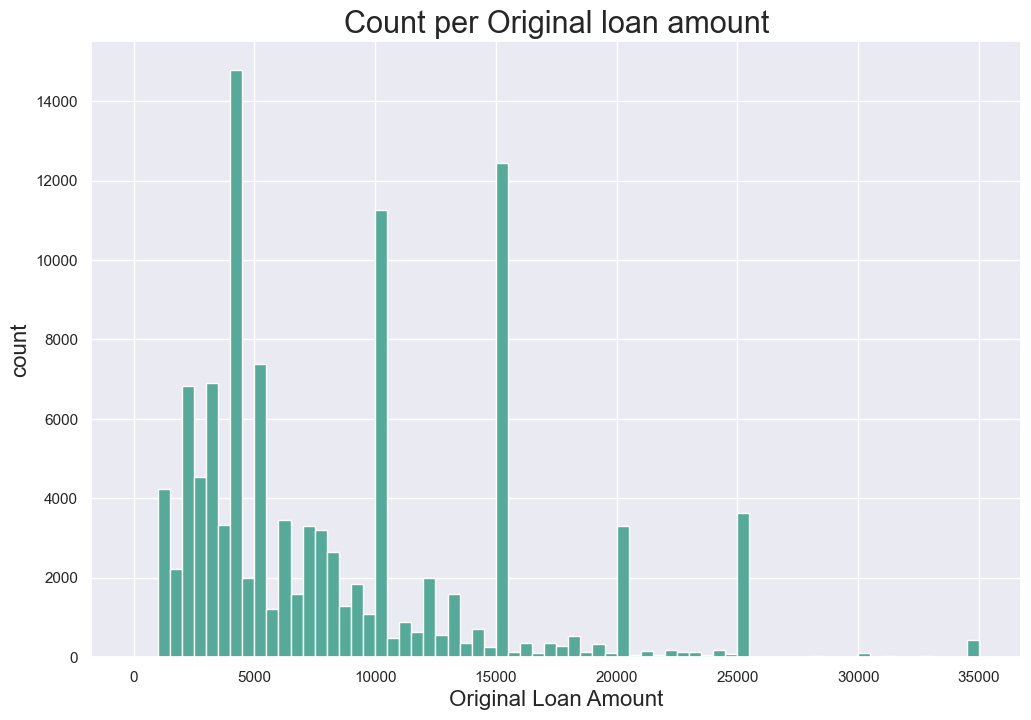

In [33]:
#Histogram showing the distribution of original loans collected
plot_histogram1(x='LoanOriginalAmount', title = 'Count per Original loan amount',xlabel= 'Original Loan Amount', ylabel='count', lower_limit=0, bns=500 )

4000 dollar loans were most requested for. Significant spikes were also observed at the 10000, 15000, 20000 and 25000 dollar loan marks. Lower amounts of monies were requested for compared to the higher values. This graph also shows a decline in the count of individuals who requested for loans above 25000 dollars.

# What percentage profit is to be expected as an investor?

In [34]:
#Summary statistics on the LenderYield column
loan_clean['LenderYield'].describe()

count    113937.000000
mean          0.182701
std           0.074516
min          -0.010000
25%           0.124200
50%           0.173000
75%           0.240000
max           0.492500
Name: LenderYield, dtype: float64

In [35]:
loan_clean.query('LenderYield==-0.010000')

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,loan_origination_date,loan_origination_time
46874,3F5C3389508503122919326,143562,2007-05-28 06:40:54.803,HR,36,Defaulted,2010-10-05,0.01315,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,NY,Professional,Full-time,1.0,False,False,NaN,2007-05-13 08:46:25.487,520.0,539.0,2001-11-28,1.0,0.0,6.0,0,0.0,0.0,1.0,3.0,3894.0,17.0,0.0,0.0,0.0,0.00,0.0,6.0,0.00,0.0,0.01,"$50,000-74,999",True,5000.0,7BAE3392151479545AEE2DB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132,41.0,81,15659,1900,2007-06-05,Q2 2007,05833388721180887095666,52.78,1840.30,1832.74,7.56,-28.07,-24.24,82.62,-15.36,5.28,1.0,0,0,0.0,1,2007-06-05,00:00:00
65259,BB4E34191946516388AD563,310792,2008-04-15 05:35:10.670,HR,36,Completed,2011-04-18,0.01987,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,3,NC,Other,Full-time,13.0,False,False,NaN,2008-03-23 00:11:48.863,520.0,539.0,1996-08-09,2.0,3.0,7.0,1,24.0,1.0,6.0,2.0,320.0,5.0,1.0,0.0,800.0,1.60,0.0,5.0,0.33,0.0,0.13,"$25,000-49,999",True,3500.0,9E143419184185232F760F6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,29821,1000,2008-04-18,Q2 2008,A7F5341636869137603A17C,27.78,1000.00,1000.00,0.00,-13.62,0.00,0.00,0.00,0.00,1.0,0,1,1000.0,1,2008-04-18,00:00:00
76858,7ADE3385294777364BFEDD6,115163,2007-03-24 10:03:30.717,C,36,Completed,2010-03-27,0.00653,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,0,MI,Food Service Management,Full-time,152.0,False,True,DE3D33744748484575A88D1,2007-03-13 23:26:35.980,660.0,679.0,1998-09-03,2.0,3.0,5.0,3,21.0,0.0,0.0,1.0,10.0,0.0,0.0,0.0,178.0,0.00,2082.0,3.0,0.33,0.0,0.06,"$1-24,999",True,1833.0,27B533839209731593947BA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,84,9000,3000,2007-03-27,Q1 2007,F0AC3377846854835F2B667,83.33,3000.00,3000.00,0.00,-46.39,0.00,0.00,0.00,0.00,1.0,0,1,50.0,2,2007-03-27,00:00:00
78920,CBC03418552010666B09260,319969,2008-04-28 11:48:10.400,C,36,Completed,2009-09-15,0.01987,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,1,NJ,Dentist,Full-time,3.0,True,True,C506336436884701891E267,2008-04-28 11:45:42.977,660.0,679.0,1996-06-22,18.0,18.0,38.0,11,1784.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,79709.0,0.60,51306.0,25.0,0.92,0.0,0.43,"$75,000-99,999",True,7917.0,DC383419893640145C50801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,71,30274,25000,2008-04-29,Q2 2008,33CB3364497014118C1E9ED,609.84,25104.16,25000.00,104.16,-272.85,-354.16,0.00,0.00,0.00,1.0,0,1,6800.0,2,2008-04-29,00:00:00
112717,C52F3426964405073574757,369381,NaT,A,36,Completed,2010-10-13,0.01315,0.0,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,7,